# Predicción de la pérdida de clientes bancarios
### Variable objetivo: Salida (Exited)

In [1]:
# Se importan los modulos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [2]:
# Se lee el dataset
df = pd.read_csv('data/dataset.csv')

In [3]:
#Se imprimen muestras aleatorias del dataframe
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5962,5963,15571193,Morrison,579,Germany,Male,42,0,144386.32,1,1,1,22497.10,1
8313,8314,15750121,Tung,639,France,Male,38,3,0.00,1,1,0,42862.82,0
6912,6913,15679884,Hs?eh,544,France,Male,48,10,78314.63,3,1,1,103713.93,1
1672,1673,15713854,Cremonesi,513,France,Female,37,6,0.00,2,1,0,110142.34,0
4921,4922,15748414,Chiang,526,Spain,Female,33,8,114634.63,2,1,0,110114.38,1
6748,6749,15637646,Rowley,756,France,Male,31,10,122647.32,1,0,0,61666.87,0
1652,1653,15675501,Woods,616,France,Male,59,5,153861.10,1,1,1,17699.48,0
7861,7862,15589948,Disher,607,Spain,Male,28,1,135936.10,2,1,1,110560.14,0
8398,8399,15582116,Ma,767,Germany,Female,45,7,132746.20,2,1,0,26628.88,1
7526,7527,15800554,Perry,850,France,Female,81,1,0.00,2,1,1,59568.24,0


In [4]:
# Se imprime el tamaño del dataframe
df.shape

(10000, 14)

In [5]:
# Se revisan los tipos de datos
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
# Se revisa si existen datos nulos
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# Se revisa si existen datos NaN
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# Se revisan los valores únicos de cada característica
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
# Debido a que 'RowNumber', 'CustomerId' y 'Surname' son datos específicos de un cliente, se eliminan. 
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [10]:
# Se comprueba la eliminación de las columnas
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1517,744,France,Male,54,6,93806.31,2,0,1,140068.77,0
3577,757,France,Male,23,2,80673.96,2,1,0,93991.65,0
1410,523,France,Female,73,7,0.00,2,0,0,130883.90,1
5466,850,Germany,Male,32,3,137714.25,1,0,1,159403.68,0
8770,615,France,Male,59,8,0.00,2,1,1,165576.55,0
7792,590,France,Male,40,8,0.00,2,1,0,62933.03,0
9392,532,Spain,Female,39,0,0.00,2,1,0,94977.30,0
3976,566,Germany,Male,22,7,144954.75,2,1,0,102246.00,0
4850,516,France,Male,27,9,0.00,1,1,0,142680.64,1
5521,815,France,Male,37,1,166115.42,1,1,0,67208.30,0


In [11]:
# Se revisan las estadísticas del dataframe
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


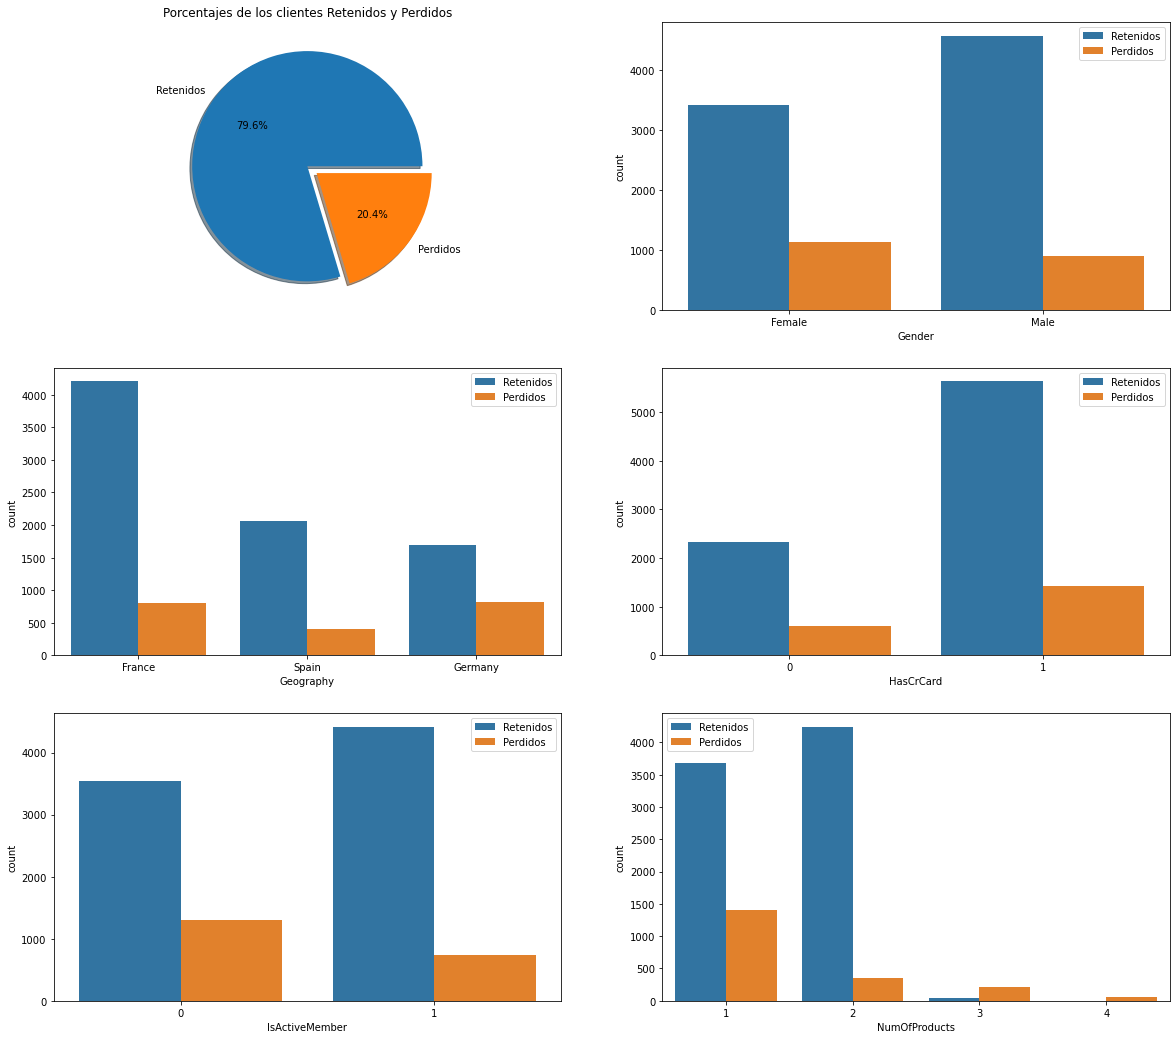

In [12]:
# Se crean dos espacios de figuras vacios para el despliegue de las gráficas
f , ax = plt.subplots(3, 2, figsize=(20, 18))

# A partir del dataframe se crea una serie para posteriormente realizar una gráfica tipo "pie" que muestre los porcentajes de los clientes Retenidos y los Perdidos
df['Exited'].value_counts().plot.pie(y='', autopct='%1.1f%%', explode=[0, 0.1], shadow=True, labels=['Retenidos', 'Perdidos'],
                                     ax = ax[0][0])

# Se crean algunas gráficas de barras para entender mejor los datos
sns.countplot(x='Gender', hue='Exited', data=df, ax=ax[0][1])
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=ax[1][0])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=ax[1][1])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=ax[2][0])
sns.countplot(x='NumOfProducts', hue = 'Exited',data = df, ax=ax[2][1])

# Se cambian los títulos
ax[0][0].set_title('Porcentajes de los clientes Retenidos y Perdidos')
ax[0][0].set_ylabel('')
ax[0][1].legend(labels=['Retenidos', 'Perdidos'])
ax[1][0].legend(labels=['Retenidos', 'Perdidos'])
ax[1][1].legend(labels=['Retenidos', 'Perdidos'])
ax[2][0].legend(labels=['Retenidos', 'Perdidos'])
ax[2][0].legend(labels=['Retenidos', 'Perdidos'])
ax[2][1].legend(labels=['Retenidos', 'Perdidos'])

# Se plotea todo
plt.show()

In [13]:
# Se reemplazan los valores de 'Male' y 'Fmale por 1 y 0
df['Gender'] = np.where(df['Gender'] == 'Male', 1, 0)

In [14]:
# Se muestra el nuevo dataframe
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4791,709,Spain,1,35,2,0.00,2,1,0,104982.39,0
9567,724,France,1,29,4,0.00,1,1,0,8982.75,0
9027,802,Germany,1,37,9,115569.21,1,0,1,119782.89,0
1965,612,France,0,33,9,0.00,1,0,0,142797.50,1
3762,590,Germany,0,40,2,117641.43,2,0,0,92198.05,0
3213,827,Spain,1,46,1,183276.32,1,1,1,13460.27,0
6947,715,Spain,1,31,7,0.00,1,1,1,149970.59,0
552,685,Spain,0,25,10,128509.63,1,1,0,121562.33,0
4963,515,France,1,40,0,109542.29,1,1,1,166370.81,0
9002,605,France,1,36,7,128829.25,1,1,0,190588.59,0


In [15]:
# Se reemplazan los valores de 'France', 'Spain' y 'Germany' por 0, 1 y 2 respectivamente
df['Geography'].replace(['France', 'Spain', 'Germany'], [0, 1, 2], inplace=True)

In [16]:
# Se muestra el nuevo dataframe
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8774,452,0,0,33,6,131698.57,2,1,0,151623.91,0
6480,679,0,0,24,6,114948.76,2,0,1,135768.25,0
2351,651,0,1,35,7,74623.50,3,1,0,129451.29,1
4080,808,2,0,37,2,100431.84,1,1,0,35140.49,1
9723,526,0,1,32,7,125540.05,1,0,0,86786.41,0
2343,706,2,1,38,5,163034.82,2,1,1,135662.17,0
3817,682,2,0,29,6,101012.77,1,0,0,32589.89,1
6503,455,2,0,37,6,170057.62,1,0,1,54398.56,0
8012,747,0,0,34,10,0.00,2,1,1,50759.80,0
9566,644,0,1,37,6,117271.80,2,1,0,104217.96,1


In [17]:
# Se separa la variable objetivo del resto del dataframe
X = df.loc[:, df.columns != 'Exited']
y = df.loc[:, 'Exited']

In [18]:
# Se revisa 'X'
X.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7614,749,0,1,37,7,0.00,2,1,0,20306.79
1559,760,2,1,42,0,77992.97,2,1,1,97906.38
5978,586,1,1,41,3,63873.56,1,1,0,83753.64
1454,521,1,0,34,7,70731.07,1,1,1,20243.97
2241,681,2,1,42,3,118199.97,2,1,0,9452.88


In [19]:
# Se revisa 'y'
y.sample(5)

4680    0
3914    0
8354    0
4264    1
3775    0
Name: Exited, dtype: int64

In [20]:
# Se separa 50 y 50 para tener datos de train, test y posteriormente tener datos de validación.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [21]:
# Se observan los datos de X_train
X_train.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7133,743,0,0,30,1,127023.39,1,1,1,138780.89
844,640,0,1,44,3,137148.68,1,1,0,92381.01
3890,670,2,0,33,9,84521.48,2,0,1,198017.05
7642,811,0,1,40,1,101514.89,1,1,1,121765.00
4359,545,2,0,44,2,127536.44,1,1,0,108398.63


In [22]:
# Se observan los datos de X_test
X_test.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6494,699,0,1,28,7,0.0,2,1,1,22684.78
8411,619,1,0,56,7,0.0,2,1,1,42442.21
181,510,0,1,65,2,0.0,2,1,1,48071.61
2934,631,0,1,33,7,0.0,1,1,1,58043.02
3189,692,0,0,42,2,0.0,2,1,0,145222.93


In [23]:
# Se observan los datos de y_train
y_train.sample(5)

9842    0
5032    0
2765    0
3939    0
4077    0
Name: Exited, dtype: int64

In [24]:
# Se observan los datos de y_test
y_test.sample(5)

2901    0
783     0
450     0
7865    0
1084    0
Name: Exited, dtype: int64

In [25]:
# Se separan los datos de test al 50% para obtener los datos de validación
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

In [26]:
# Se muestran los tamaños de los dataframes
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_valid.shape, y_valid.shape

((5000, 10), (5000,), (2500, 10), (2500,), (2500, 10), (2500,))

In [27]:
# Se utiliza el modelo XGBOOST para la clasificación binaria. Se establece el parámetro use_label_encoder = false para evitar WARNINGS.
xgb = xgboost.XGBClassifier(use_label_encoder =False)

In [28]:
# Parámetros para probar en el modelo de xgboost
parameters = {'objective':['binary:logistic'],
             'learning_rate':[0.01, 0.1],
             'n_estimators':[10, 200]}

In [29]:
# Parámetros para el algoritmo de gridsearch
fit_params = {'early_stopping_rounds':10,
             'eval_metric':'logloss',
             'eval_set':[(X_test, y_test)]}

In [30]:
# Se crea el gridsearch y se le pasan los parámetros
clf = GridSearchCV(xgb, parameters, cv=5, scoring='accuracy')

In [31]:
# Se entrena
clf.fit(X_train, y_train, **fit_params)

[0]	validation_0-logloss:0.68752
[1]	validation_0-logloss:0.68198
[2]	validation_0-logloss:0.67656
[3]	validation_0-logloss:0.67124
[4]	validation_0-logloss:0.66602
[5]	validation_0-logloss:0.66093
[6]	validation_0-logloss:0.65594
[7]	validation_0-logloss:0.65104
[8]	validation_0-logloss:0.64623
[9]	validation_0-logloss:0.64153
[0]	validation_0-logloss:0.68749
[1]	validation_0-logloss:0.68195
[2]	validation_0-logloss:0.67654
[3]	validation_0-logloss:0.67119
[4]	validation_0-logloss:0.66599
[5]	validation_0-logloss:0.66085
[6]	validation_0-logloss:0.65584
[7]	validation_0-logloss:0.65094
[8]	validation_0-logloss:0.64608
[9]	validation_0-logloss:0.64138
[0]	validation_0-logloss:0.68747
[1]	validation_0-logloss:0.68190
[2]	validation_0-logloss:0.67646
[3]	validation_0-logloss:0.67113
[4]	validation_0-logloss:0.66588
[5]	validation_0-logloss:0.66076
[6]	validation_0-logloss:0.65575
[7]	validation_0-logloss:0.65080
[8]	validation_0-logloss:0.64592
[9]	validation_0-logloss:0.64116
[0]	valida

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [32]:
# Se muestra el mejor estimador obtenido
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [33]:
# Se muestra el mejor score obtenido
clf.best_score_

0.8562

In [34]:
# Se asigna el mejor estimador a la variable best_xgb
best_xgb = clf.best_estimator_

In [35]:
# Se realizan las predicciones con el mejor estimador
y_preds = best_xgb.predict(X_valid)

In [36]:
# Se crea un dataframe con las predicciones realizadas por el modelo
compare = pd.DataFrame({'real': y_valid,
                    'predictions':y_preds})

In [37]:
# Se muestran 20 predicciones aleatorias
compare.sample(20)

,real,predictions
6639,0,0
3928,0,0
9458,0,0
9790,0,0
5157,0,1
2636,0,0
2840,0,0
5513,0,0
8971,0,0
4525,0,0


In [38]:
# Se obtiene el accuracy
accuracy = accuracy_score(y_valid, y_preds)

In [39]:
# Se imprime el valor del accuracy
accuracy

0.8704

In [40]:
# Se obtiene la precision
precision = precision_score(y_valid, y_preds)

In [41]:
# Se imprime el valor de la precision
precision

0.7767295597484277

In [42]:
# Se obtiene el recall
recall = recall_score(y_valid, y_preds)

In [43]:
# Se imprime valor del recall
recall

0.494

In [44]:
# Se obtiene el f1_score
f1_score = f1_score(y_valid, y_preds)

In [45]:
# Se imprime el valor del f1_score
f1_score

0.6039119804400978

In [46]:
# Se obtiene la matriz de confusion
confusion = confusion_matrix(y_valid, y_preds)

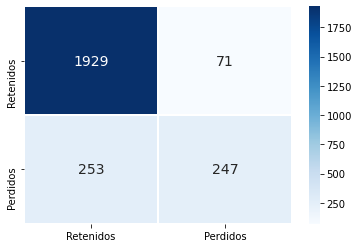

In [47]:
# Se imprime la matriz de confusion
labels = ['Retenidos', 'Perdidos']

sns.heatmap(confusion, cmap="Blues", annot=True, fmt=".0f", 
            linewidths=1, yticklabels=labels, xticklabels=labels, 
            annot_kws = {'fontsize':14,
                         })
plt.show()

In [48]:
# Se salva el modelo en formato .json
best_xgb.save_model('xgboost_model.json')